<a href="https://colab.research.google.com/github/hashaski/Data_Base_Salario_Anual/blob/main/An%C3%A1lise_Explorat%C3%B3ria_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import das bibliotecas e da base de dados.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/hashaski/Data_Base_Salario_Anual/main/ds_salaries.csv'

salario_anual = pd.read_csv(url)

salario_anual

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Separando os dados que é do meu interesse, em que nesse caso seria os salários em USD.

In [3]:
salario_anual_usd = salario_anual.salary_in_usd
print(salario_anual_usd)

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary_in_usd, Length: 607, dtype: int64


Média feita usando a biblioteca Numpy e manualmente.

In [4]:
media = np.mean(salario_anual_usd)
print(f'A média dos salários anuais em USD feita usando a biblioteca numpy é {media:.2f}')

def media_manual(list):
  return sum(list) / len(list)

print(f'A média manual dos salários anuais em USD é {media_manual(salario_anual_usd):.2f}')

A média dos salários anuais em USD feita usando a biblioteca numpy é 112297.87
A média manual dos salários anuais em USD é 112297.87


Mediana feita usando a biblioteca Numpy e manualmente.

In [5]:
mediana = np.median(salario_anual_usd)
print(f'A mediana dos salários anuais em USD feita usando a biblioteca numpy é {mediana}')

def mediana_manual(list):
  list = sorted(list)
  if len(list) % 2 == 0:
    return (list[len(list) // 2] + list[(len(list) // 2) - 1]) / 2
  else:
    return list[len(list) // 2]

print(f'A mediana manual dos salários anuais em USD é {mediana_manual(salario_anual_usd):.1f}')

A mediana dos salários anuais em USD feita usando a biblioteca numpy é 101570.0
A mediana manual dos salários anuais em USD é 101570.0


Variância populacional e amostral usando a biblioteca Numpy e manualmente.

In [6]:
#'ddof' se refere ao grau de liberdade dos dados.

variancia_populacional = np.var(salario_anual_usd, ddof = 0)
print(f'A variância populacional dos salários anuais feita usando a biblioteca numpy é {variancia_populacional:.2f}')

def variancia_pop_manual(list):
  soma = 0
  for i in range(len(list)):
    soma += (list[i] - media_manual(list)) ** 2
  return soma / len(list)

print(f'A variância populacional manual dos salários anuais é {variancia_pop_manual(salario_anual_usd):.2f}\n')


variancia_amostral = np.var(salario_anual_usd, ddof = 1)
print(f'A variância amostral dos salários anuais feita usando a biblioteca numpy é {variancia_amostral:.2f}')

def variancia_amos_manual(list):
  soma = 0
  for i in range(len(list)):
    soma += (list[i] - media_manual(list)) ** 2
  return soma / (len(list) - 1)

print(f'A variância amostral manual dos salários anuais é {variancia_amos_manual(salario_anual_usd):.2f}')

A variância populacional dos salários anuais feita usando a biblioteca numpy é 5026637881.19
A variância populacional manual dos salários anuais é 5026637881.19

A variância amostral dos salários anuais feita usando a biblioteca numpy é 5034932663.18
A variância amostral manual dos salários anuais é 5034932663.18


Desvio padrão populacional e amostral usando a biblioteca Numpy e manualmente.

In [7]:
#'ddof' se refere ao grau de liberdade dos dados.

desvio_populacional = np.std(salario_anual_usd, ddof = 0)
print(f'O desvio padrão populacional dos salários anuais feito usando a biblioteca numpy é {desvio_populacional:.2f}')

def desvio_populacional_manual(list):
  return variancia_pop_manual(list) ** 0.5

print(f'O desvio padrão populacional manual dos salários anuais é {desvio_populacional_manual(salario_anual_usd):.2f}\n')

desvio_amostral = np.std(salario_anual_usd, ddof = 1)
print(f'O desvio padrão amostral dos salários anuais feito usando a biblioteca numpy é {desvio_amostral:.2f}')

def desvio_amostral_manual(list):
  return variancia_amos_manual(list) ** 0.5

print(f'O desvio padrão amostral manual dos salários anuais é {desvio_amostral_manual(salario_anual_usd):.2f}')

O desvio padrão populacional dos salários anuais feito usando a biblioteca numpy é 70898.79
O desvio padrão populacional manual dos salários anuais é 70898.79

O desvio padrão amostral dos salários anuais feito usando a biblioteca numpy é 70957.26
O desvio padrão amostral manual dos salários anuais é 70957.26


Coeficiente de variação populacional e amostral manualmente.

In [8]:
def coeficiente_pop(list):
    return (desvio_populacional_manual(list) / media_manual(list)) * 100
print(f'O coeficiente populacional manual dos dados simulados é {coeficiente_pop(salario_anual_usd):.2f}%\n')


def coeficiente_amos(list):
    return (desvio_amostral_manual(list) / media_manual(list)) * 100
print(f'O coeficiente amostral manual dos dados simulados é {coeficiente_amos(salario_anual_usd):.2f}%')

O coeficiente populacional manual dos dados simulados é 63.13%

O coeficiente amostral manual dos dados simulados é 63.19%


Quartis usando a biblioteca Scipy e manualmente.

In [9]:
quartil_1 = sp.scoreatpercentile(salario_anual_usd, 25)
print(f'O primeiro quartil dos salários é {quartil_1}')

def quartil_1_manual(list):
    list = sorted(list)
    orig_median = mediana_manual(list)
    while max(list) >= orig_median:
        list.remove(max(list))
    return mediana_manual(list)
print(f'O primeiro quartil manual dos salários é {quartil_1_manual(salario_anual_usd):.1f}\n')


quartil_3 = sp.scoreatpercentile(salario_anual_usd, 75)
print(f'O terceiro quartil dos salários é {quartil_3}')

def quartil_3_manual(list):
    list = sorted(list)
    orig_median = mediana_manual(list)
    while min(list) <= orig_median:
        list.remove(min(list))
    return mediana_manual(list)
print(f'O terceiro quartil manual dos salários é {quartil_3_manual(salario_anual_usd):.1f}')

O primeiro quartil dos salários é 62726.0
O primeiro quartil manual dos salários é 62726.0

O terceiro quartil dos salários é 150000.0
O terceiro quartil manual dos salários é 150000.0


Histograma usando o Matplotlib.

(array([149., 228., 149.,  61.,  10.,   2.,   4.,   3.,   0.,   1.]),
 array([  2859. ,  62573.1, 122287.2, 182001.3, 241715.4, 301429.5,
        361143.6, 420857.7, 480571.8, 540285.9, 600000. ]),
 <a list of 10 Patch objects>)

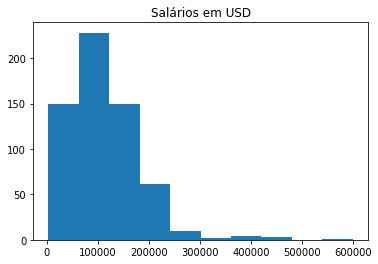

In [10]:
plt.title('Salários em USD')
plt.hist(salario_anual_usd)


Boxplot usando o Matplotlib.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f74f69ef350>,
 'caps': [<matplotlib.lines.Line2D at 0x7f74f69efdd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f74f69e7d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f74f69f78d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f74f69f7e10>],
 'means': []}

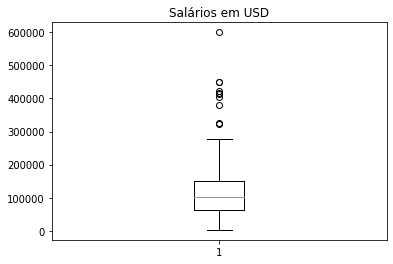

In [11]:
plt.title('Salários em USD')
plt.boxplot(salario_anual_usd)